In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dl_plus.txt', sep=" ", header=None)
data.columns = ["number", "date", "scores"]

In [3]:
data.head()

,number,date,scores
0,1.0,15.09.2012,"4,5,37,39,43,49"
1,2.0,18.09.2012,"24,36,40,41,43,47"
2,3.0,20.09.2012,"9,15,17,20,23,40"
3,4.0,22.09.2012,"11,13,22,28,32,37"
4,5.0,25.09.2012,"4,9,14,24,44,47"


In [4]:
data['one'], data['two'], data['three'], data['four'], data['five'], data['six'] = data['scores'].str.split(',').str
data.drop('scores', axis=1, inplace=True)

for col in ['one', 'two', 'three', 'four', 'five', 'six']:
    data[col] = data[col].astype(int)

In [5]:
data.drop(['number', 'date'], axis=1, inplace=True)
data.head()

,one,two,three,four,five,six
0,4,5,37,39,43,49
1,24,36,40,41,43,47
2,9,15,17,20,23,40
3,11,13,22,28,32,37
4,4,9,14,24,44,47


In [6]:
sns.set()
def draw_figure(number):
    plt.figure(figsize=(18,12))
    sns.countplot(x=number, data=data)
    plt.title(number, fontsize=24)
    plt.ylabel('occurrences', fontsize=16)
    plt.xlabel('number', fontsize=16)

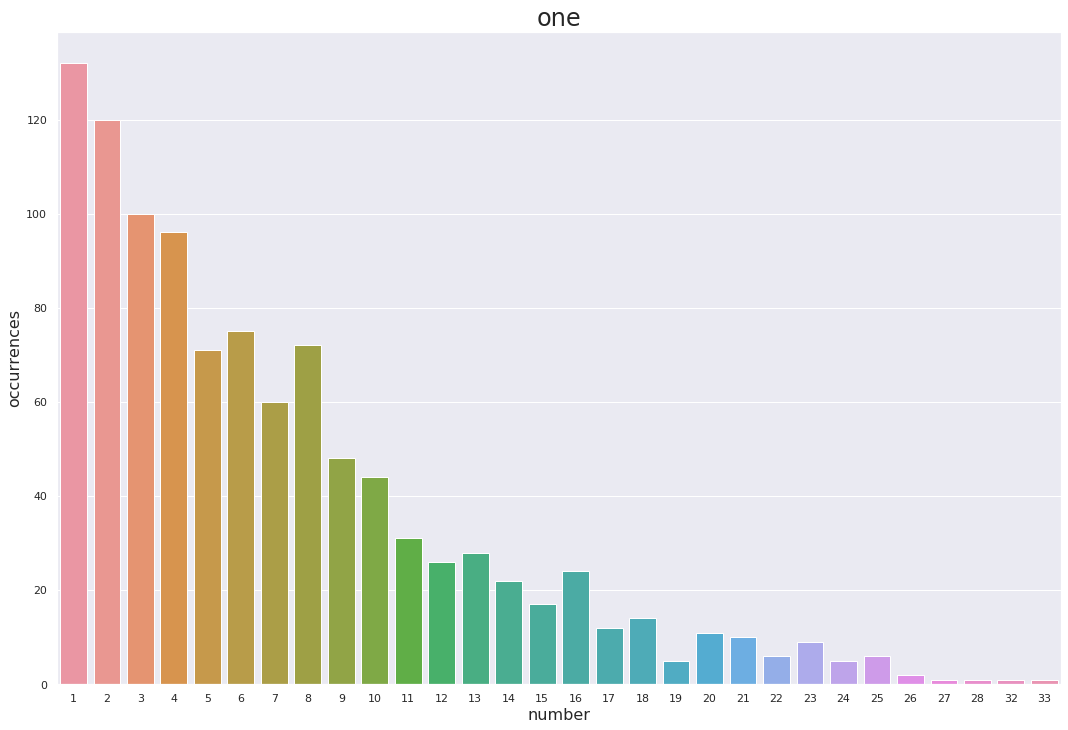

In [7]:
draw_figure('one')

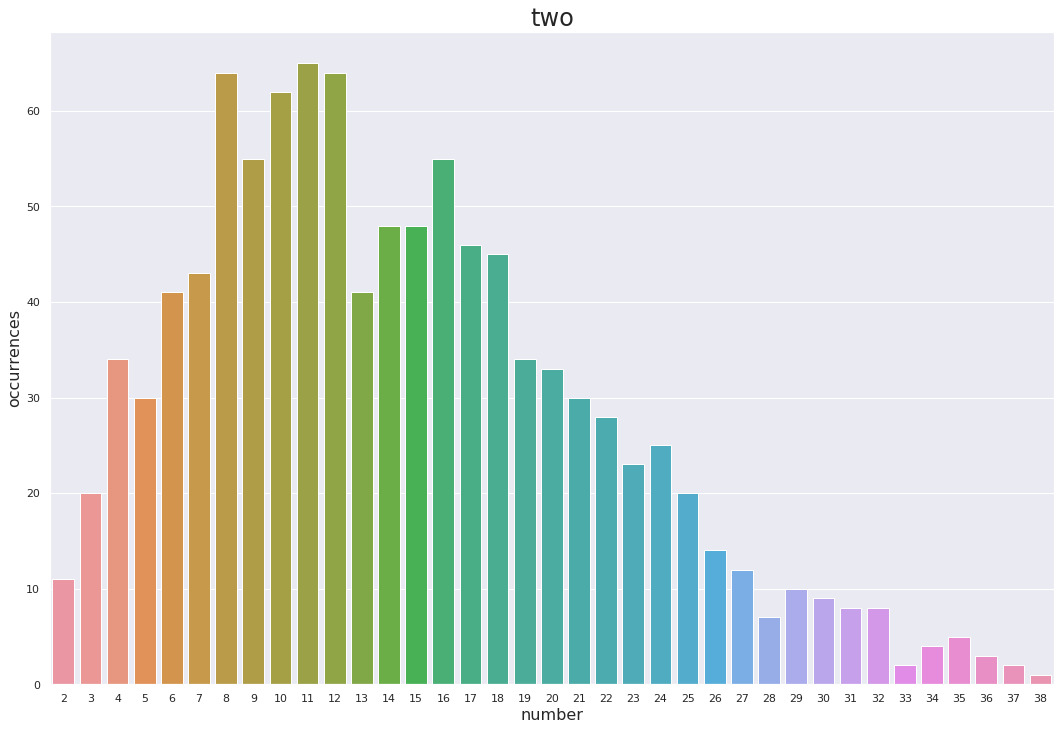

In [8]:
draw_figure('two')

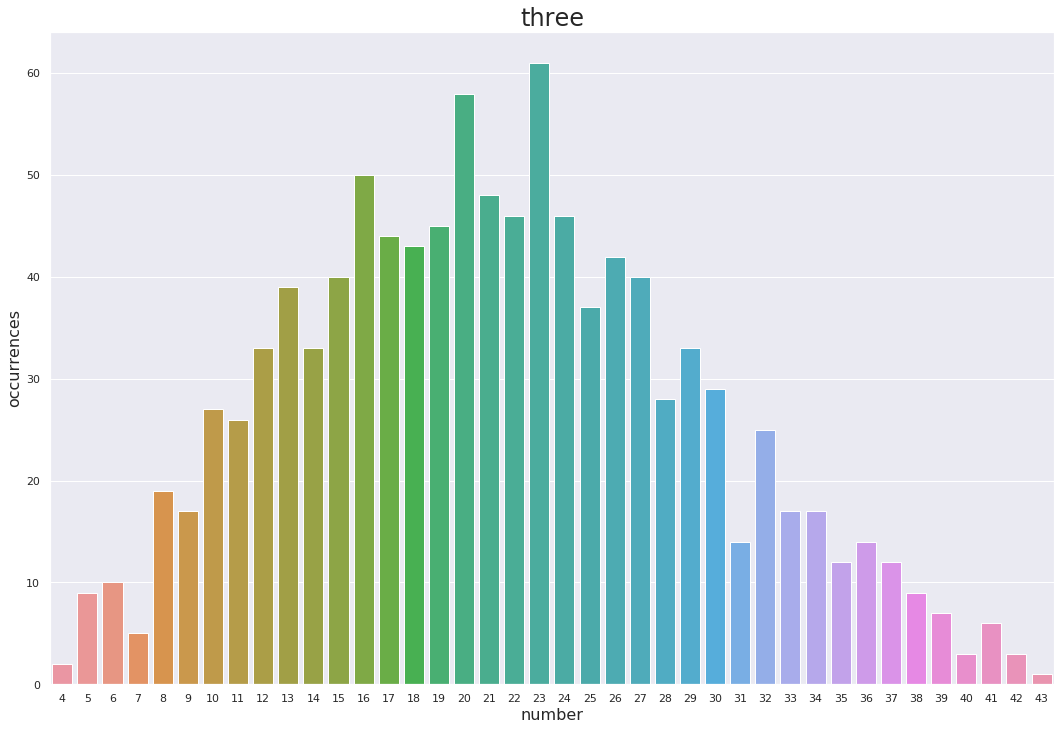

In [9]:
draw_figure('three')

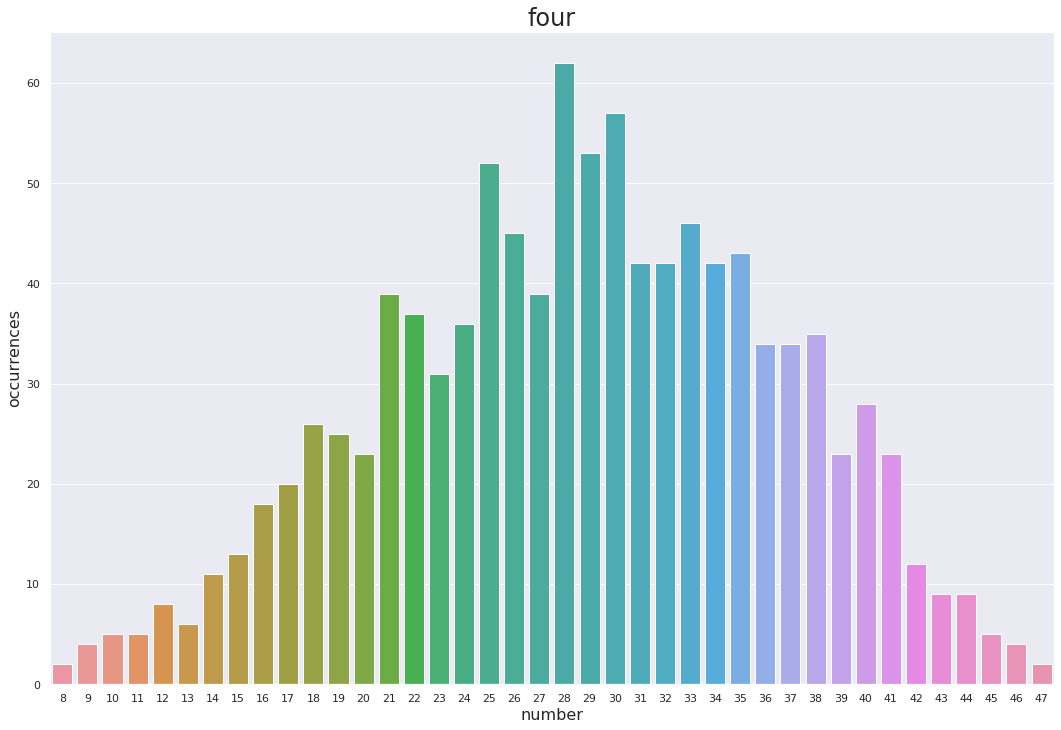

In [10]:
draw_figure('four')

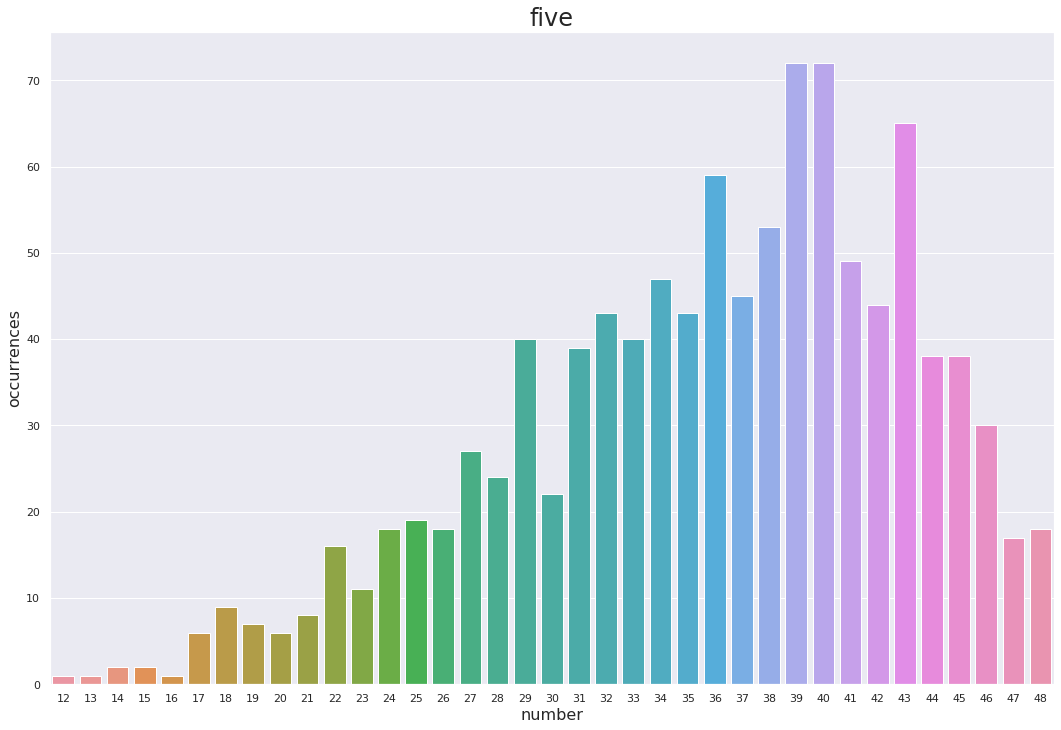

In [11]:
draw_figure('five')

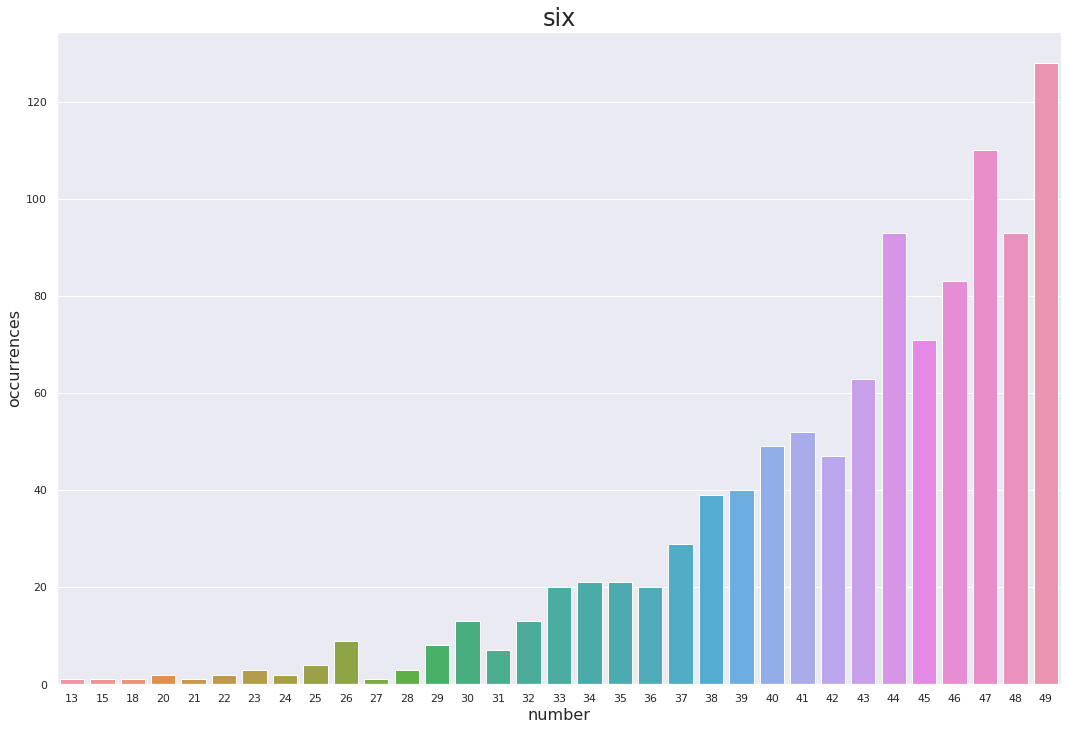

In [12]:
draw_figure('six')

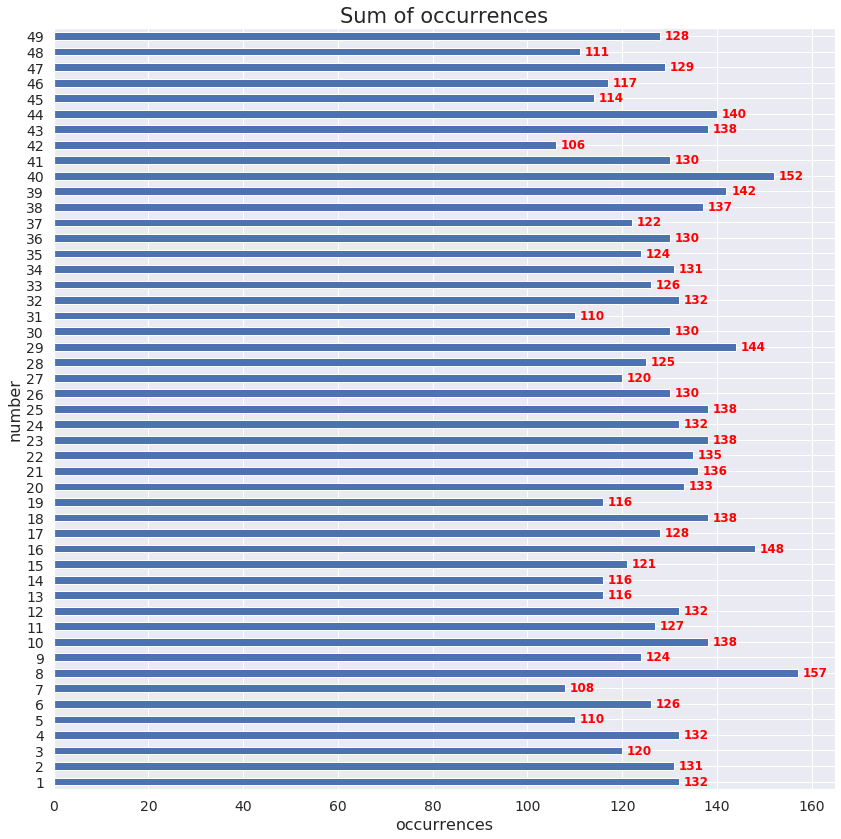

In [13]:
sum_of_occurrences = data['one'].value_counts().add(data['two'].value_counts(), fill_value=0).add(data['three'].value_counts(), fill_value=0).add(data['four'].value_counts(), fill_value=0).add(data['five'].value_counts(), fill_value=0).add(data['six'].value_counts(), fill_value=0)
sum_of_occurrences = sum_of_occurrences.astype('int64', copy=False)

ax = sum_of_occurrences.plot(kind='barh', figsize=(14,14), title='sum of occurrences', fontsize=14)

ax.set_title('Sum of occurrences',fontsize=21)
ax.set_xlabel('occurrences',fontsize = 16)
ax.set_ylabel('number', fontsize = 16)

for i, v in enumerate(sum_of_occurrences):
    ax.text(v+1, i-0.2, str(v), color='red', fontweight='bold')

In [14]:
sum_of_occurrences.nlargest(6)

8     157
40    152
16    148
29    144
39    142
44    140
dtype: int64

In [15]:
# input : sequential occurrences of given numbers
input_weights = np.array(sum_of_occurrences)
input_weights

array([132, 131, 120, 132, 110, 126, 108, 157, 124, 138, 127, 132, 116,
       116, 121, 148, 128, 138, 116, 133, 136, 135, 138, 132, 138, 130,
       120, 125, 144, 130, 110, 132, 126, 131, 124, 130, 122, 137, 142,
       152, 130, 106, 138, 140, 114, 117, 129, 111, 128])

In [16]:
# output : probability of each number
in_out_layer = np.array([(i+1) for i in range(49)])
in_out_layer

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [17]:
in_out_layer.shape

(49,)

In [25]:
model = tf.keras.Sequential()

In [26]:
model.add(tf.keras.layers.Dense(49, activation='softmax', input_dim=1))

In [27]:
for layer in range(5):
    model.add(tf.keras.layers.Dense(49, activation='softmax'))

In [28]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [29]:
model.fit(in_out_layer, in_out_layer, epochs=10)

Epoch 1/10
49/49 [==============================] - 0s 4ms/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 2/10
49/49 [==============================] - 0s 196us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 3/10
49/49 [==============================] - 0s 301us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 4/10
49/49 [==============================] - 0s 178us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 5/10
49/49 [==============================] - 0s 182us/sample - loss: 823.9801 - acc: 0.0000e+00
Epoch 6/10
49/49 [==============================] - 0s 95us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 7/10
49/49 [==============================] - 0s 219us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 8/10
49/49 [==============================] - 0s 141us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 9/10
49/49 [==============================] - 0s 242us/sample - loss: 823.9800 - acc: 0.0000e+00
Epoch 10/10
49/49 [==============================] - 0s 169us/sample - loss:

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 49)                98        
_________________________________________________________________
dense_7 (Dense)              (None, 49)                2450      
_________________________________________________________________
dense_8 (Dense)              (None, 49)                2450      
_________________________________________________________________
dense_9 (Dense)              (None, 49)                2450      
_________________________________________________________________
dense_10 (Dense)             (None, 49)                2450      
_________________________________________________________________
dense_11 (Dense)             (None, 49)                2450      
Total params: 12,348
Trainable params: 12,348
Non-trainable params: 0
_________________________________________________________________


In [32]:
predictions = model.predict()
predictions

TypeError: predict() missing 1 required positional argument: 'x'

In [ ]:
#tf.keras.utils.plot_model(model, to_file='model.png')